### Convolutional Neural Networks for Image Classification
- This notebook is developing a CNN model to predict Image
- Using CIFAR 10 dataset from Keras
- More details on Dataset : https://www.cs.toronto.edu/~kriz/cifar.html
- From Keras : https://keras.io/api/datasets/cifar10/
- Label description:
   - 0 	airplane
   - 1 	automobile
   - 2 	bird
   - 3 	cat
   - 4 	deer
   - 5 	dog
   - 6 	frog
   - 7 	horse
   - 8 	ship
   - 9 	truck

In [6]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
# import data from keras datasets
from tensorflow.keras.datasets import cifar10

In [8]:
# load data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 332s 2us/step


In [9]:
# check the shapes
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [10]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

- We can see the shape of X_train as (50000, 32, 32, 3) - indicates there are 50000 samples, width of 32 pixels and height of 32 pixels and 3 color channels maybe representing RGB as these are color image data

In [11]:
sample_image = X_train[0]
sample_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
sample_image.max(), sample_image.min()

(255, 0)

- the values in each pixel ranges from 0 to 255
- later on we will need to normalize the data, maybe between 0 and 1 for the model to train easier and faster way

### Preprocessing Data

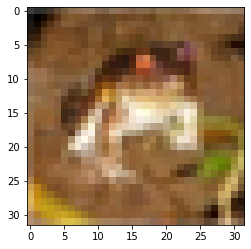

In [13]:
# plotting this sample image
plt.imshow(sample_image)

- From the image above, it seems to be a frog but not very clear.

In [18]:
y_train[0]

array([6], dtype=uint8)

- Yes, 6 represents frog

In [14]:
# check the target data
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
y_train.max(), y_train.min()

(9, 0)

- We can see the target data is listed in integer numeric values
- these values cannot be used as it is as the model will treat these values as a continuous value and will predict accordingly
- We will encode these target values using one-hot encoding using keras

In [19]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

In [20]:
# check the shape of the target 
y_train.shape

(50000, 1)

In [21]:
# lets encode our target data 
# passing the number of class explicitly
# otherwise model will automatically identify these class if not provided
y_cat_train = to_categorical(y_train, 10)

y_cat_test = to_categorical(y_test, 10)

- Now we can see the integer numeric data is now converted into an binary value array of 10 elements 
- for the first sample image, the value is 5, so the index position 5 has 1 indicating 5

### Processing Training Data
- We can use scikit learn preprocessing like MinMaxScaler to normalize the data, but we know that the value in a pixel will be between 0 and 255
- So, we can just divide the value by 255, that will basically give a value between 0 and 1 which is what we are looking for

In [22]:
# normalizing the train and test data
X_train = X_train/255
X_test = X_test/255

In [23]:
# check one of a sample
X_train[0].max(), X_train[0].min()

(1.0, 0.0)

In [24]:
scaled_sample_image = X_train[0]

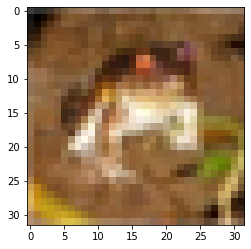

In [25]:
# plot and check the image
plt.imshow(scaled_sample_image)

- There is no change in the original image and the scaled image as we have just only scaled the values and not altering the values

In [27]:
# check the shape 
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

- We dont need to reshape our data as it is already in the format that the model is expecting

## Training/Fitting the model

In [28]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D

In [29]:
# initialize the model
model = Sequential()

# add layers
model.add(Conv2D(filters=32,                # number of filter kernels
                 kernel_size=(4,4),         # size of filter kernel
                 strides=(1,1),             # stride -- like in terms of how many pixels to move to cover
                 padding = 'VALID',         # https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t
                 input_shape = (32, 32, 3),    # input shape of the data
                 activation = 'relu'))      # activation function

# add the max pool layer
model.add(MaxPool2D(pool_size=(2,2)))


# add another layer of Conv2D as the data is a complex one

model.add(Conv2D(filters=32,                # number of filter kernels
                 kernel_size=(4,4),         # size of filter kernel
                 strides=(1,1),             # stride -- like in terms of how many pixels to move to cover
                 padding = 'VALID',         # https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t
                 input_shape = (32, 32, 3),    # input shape of the data
                 activation = 'relu'))      # activation function

# add the max pool layer
model.add(MaxPool2D(pool_size=(2,2)))

# flatten the data, before passing to Dense layer
# this will convert 32x32x3 data into an array containing 3072 elements which is a hugh number
model.add(Flatten())

# add Dense layer
model.add(Dense(256, activation = 'relu'))

#output layer
model.add(Dense(10, activation='softmax')) # units = 10-> 10 target labels
# normally use softmax for multiclass classification 


# compile the model
model.compile(optimizer='rmsprop',     # can use adam as well
              loss='categorical_crossentropy', # for multiclass classification
             metrics=['accuracy']       # additional metrics we can pass that we want to see while training
             )                          # this will get reported in model history

# https://keras.io/metrics/  -- to check all available metrics from keras

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

### Adding Early Stopping

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', # we can also provide the accuracy as we have provided in the metrics 
                           patience=2)

In [33]:
# training the model
model.fit(X_train,
          y_cat_train,
          epochs=15,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop]
         )

Epoch 1/15
1563/1563 [==============================] - 36s 21ms/step - loss: 1.5218 - accuracy: 0.4521 - val_loss: 1.3659 - val_accuracy: 0.5143
Epoch 2/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1624 - accuracy: 0.5916 - val_loss: 1.3911 - val_accuracy: 0.5368
Epoch 3/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0116 - accuracy: 0.6494 - val_loss: 1.0955 - val_accuracy: 0.6313
Epoch 4/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9087 - accuracy: 0.6850 - val_loss: 1.0397 - val_accuracy: 0.6496
Epoch 5/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8284 - accuracy: 0.7173 - val_loss: 0.9640 - val_accuracy: 0.6820
Epoch 6/15
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7650 - accuracy: 0.7400 - val_loss: 0.9692 - val_accuracy: 0.6857
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7096 - accuracy: 0.7595 - val_loss: 1.1230 -

- Model Early Stopped

### Model Evaluation

In [34]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.521761,0.45208,1.365876,0.5143
1,1.162397,0.59156,1.391146,0.5368
2,1.011584,0.64938,1.095472,0.6313
3,0.908705,0.68498,1.039683,0.6496
4,0.828413,0.71734,0.963978,0.6820
5,0.764995,0.74002,0.969221,0.6857
6,0.709646,0.75950,1.123025,0.6592


- now we can see val_accuracy in the history as we have added as part of the metrics

<AxesSubplot:>

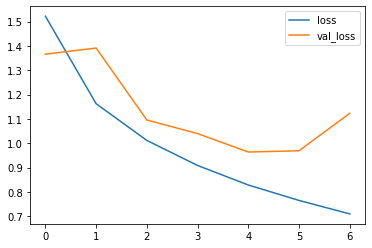

In [35]:
# plot and compare the metrics
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

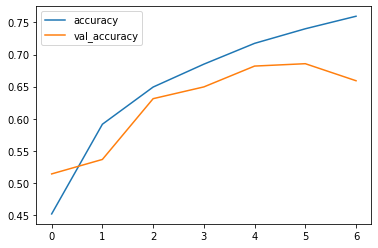

In [36]:
# plot and compare the metrics
metrics[['accuracy', 'val_accuracy']].plot()

- We can the training loss kept reducing but the validation loss kind of remain same for at least 2 epochs, so the early stop was called
- Simlarly in the accuracy metrics also, the training accuracy kind of kept increasing even about to reach 100% but the validation accuracy remains unchanged.

In [41]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x0000021E3B834040>>

In [42]:
### Check the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# get model predictions
predict_x=model.predict(X_test) 
test_preds=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 7ms/step


In [44]:
test_preds

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [45]:
predict_x[0]

array([1.5382755e-03, 6.1139923e-05, 2.1474423e-02, 8.7393188e-01,
       2.3161909e-02, 6.8380564e-02, 9.9163083e-03, 1.2852075e-03,
       2.1594508e-04, 3.4395573e-05], dtype=float32)

In [46]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.65      0.75      0.69      1000
           1       0.91      0.68      0.78      1000
           2       0.66      0.46      0.54      1000
           3       0.36      0.72      0.48      1000
           4       0.71      0.56      0.62      1000
           5       0.62      0.42      0.50      1000
           6       0.84      0.69      0.76      1000
           7       0.69      0.76      0.72      1000
           8       0.77      0.78      0.77      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.66     10000
   macro avg       0.70      0.66      0.66     10000
weighted avg       0.70      0.66      0.66     10000



- Here in the above report, we can see that scores for label 3 and label 5 are very poor. 
- This might be because, label 3 represent cat and label 5 represents dog. This seems little hard for the model to classify accurately
- But considering the overall accuracy of 0.66 is shouldnt be that bad.
- As the actual probability for accurately classifying a label is around 10% since we have 10 labels.

In [47]:
print(confusion_matrix(y_test, test_preds))

[[750   5  25  46  11  12   4  17  84  46]
 [ 57 678  14  47   3   7   7  16  48 123]
 [103   4 462 193  67  49  42  58  14   8]
 [ 27   2  37 721  34  78  29  47  12  13]
 [ 39   0  53 195 556  30  21  82  21   3]
 [ 23   2  31 398  26 416  16  75   6   7]
 [  8   2  47 171  41  21 690  13   6   1]
 [ 21   1  13 100  44  38   4 759   6  14]
 [ 87  16  11  48   3   9   5  11 781  29]
 [ 47  33   5  61   0   7   3  25  40 779]]


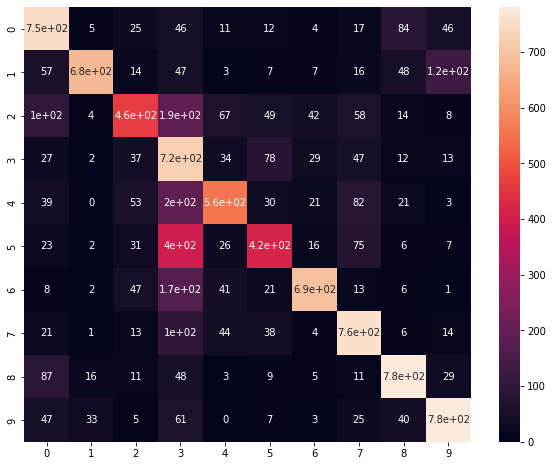

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True)
plt.show();

## For new data

In [49]:
new_data = X_test[8]
new_data.max(), new_data.min()

(0.984313725490196, 0.06274509803921569)

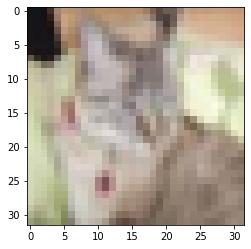

In [50]:
plt.imshow(new_data)

In [51]:
new_data.shape

(32, 32, 3)

- We should reshape new data to match with the input shape that we used to train our model i.e.
- (number of samples, width, height, num_channels)
- for one new data it will be (1, 32, 32, 3)

In [52]:
# reshape new data
new_data = new_data.reshape(1,32,32,3)

In [53]:
# predict using the model
np.argmax(model.predict(new_data), axis = 1)

1/1 [==============================] - 0s 165ms/step


array([3], dtype=int64)

In [54]:
# true value
y_test[8]

array([3], dtype=uint8)